# <a id='toc1_'></a>[Feature Selection using Wrapper Methods](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Feature Selection using Wrapper Methods](#toc1_)    
  - [Exhaustive Feature Selection:](#toc1_1_)    
    - [For Classification Problems:](#toc1_1_1_)    
    - [For Regression Problems:](#toc1_1_2_)    
  - [Sequential Backward Elimination](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [35]:
## Import necessary libraries

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import set_config

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# For Exhaustive Feature Selection
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# For Sequential Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

import matplotlib.pyplot as plt

set_config(transform_output="pandas")

In [2]:
## Load the dataset
## Classification dataset
df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

## Regression dataset
df_reg = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_reg.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## <a id='toc1_1_'></a>[Exhaustive Feature Selection:](#toc0_)

### <a id='toc1_1_1_'></a>[For Classification Problems:](#toc0_)

In [4]:
lr = LogisticRegression(max_iter=10_000)

# define the Exhaustive Feature Selection method
sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

# run the Exhaustive Feature Selection method
sel.fit(df.iloc[:,:-1], df.iloc[:,-1])

Features: 15/15

ExhaustiveFeatureSelector(estimator=LogisticRegression(max_iter=10000),
                          feature_groups=[[0], [1], [2], [3]], max_features=4)

In [5]:
# find the best score achieved with selected features
print('Best accuracy score: %.2f' % sel.best_score_)

Best accuracy score: 0.97


In [6]:
# find the best combination of features
print('Best subset:', sel.best_feature_names_)

Best subset: ('sepal_width', 'petal_length', 'petal_width')


In [7]:
# you can also see the performances of all subsets
sel.get_metric_dict()

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',),
  'ci_bound': 0.06961168520972599,
  'std_dev': 0.054160256030906434,
  'std_err': 0.027080128015453217},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',),
  'ci_bound': 0.04996313010354542,
  'std_dev': 0.038873012632301994,
  'std_err': 0.019436506316150997},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',),
  'ci_bound': 0.051411636732294784,
  'std_dev': 0.039999999999999994,
  'std_err': 0.019999999999999997},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  

In [8]:
# convert the dictionary to a dataframe for better visualization
pd.DataFrame.from_dict(sel.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


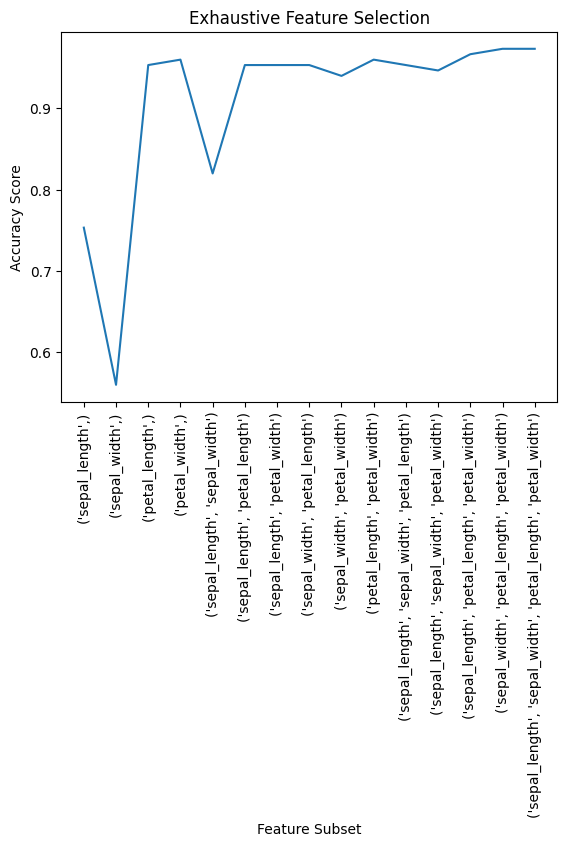

In [9]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.xlabel("Feature Subset"); plt.ylabel("Accuracy Score")
plt.title("Exhaustive Feature Selection")
plt.show()

### <a id='toc1_1_2_'></a>[For Regression Problems:](#toc0_)

In [19]:
## Create training & testing datasets
X_train, X_test, y_train, y_test = train_test_split(df_reg.iloc[:,:-1], df_reg.iloc[:,-1], test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [20]:
## Baseline model

# first we will train a model with all the features and see the performance. This will be used
# to see the performance of the model with reduced features in the later steps.

# 1. Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Train the model
lr = LinearRegression()
training_score = cross_val_score(lr, X_train, y_train, cv=5, scoring="r2").mean()
testing_score  = cross_val_score(lr, X_test, y_test, cv=5, scoring="r2").mean()

# 3. Evaluate the model
print(f"Training score: {training_score:.3f}")
print(f"Testing score: {testing_score:.3f}")

# From the above output, we can see that the model is overfitting. Let's see if we can reduce the
# number of features and improve the performance of the model.

Training score: 0.724
Testing score: 0.545


In [21]:

%%time

## Exhaustive Feature Selection for Regression Problems

# define the ML model
lr = LinearRegression()

# define the feature selection method
efs = EFS(lr, max_features=X_train.shape[-1], scoring='r2', cv=10, print_progress=True, n_jobs=-1)
sel = efs.fit(X_train, y_train)

Features: 8191/8191

CPU times: total: 2.12 s
Wall time: 26.3 s


In [22]:
## Get the best performing feature combination
print('Best accuracy score: %.2f' % sel.best_score_)
print('Best subset (indices):', sel.best_feature_names_)

Best accuracy score: 0.70
Best subset (indices): ('crim', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat')


In [23]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.06187201349312821, 0.21695752952290703, 0.1...",0.1113,"(crim,)",0.068626,0.092399,0.0308
1,"(1,)","[-0.06909411223332595, 0.06378364489046917, 0....",0.080141,"(zn,)",0.043549,0.058635,0.019545
2,"(2,)","[0.2581400495130045, 0.24192652096087108, 0.15...",0.197438,"(indus,)",0.056161,0.075616,0.025205
3,"(3,)","[-0.06519180407233627, -0.11570770910402528, 0...",0.002908,"(chas,)",0.057893,0.077949,0.025983
4,"(4,)","[0.18831320204786572, 0.15611671149828166, 0.1...",0.15303,"(nox,)",0.053874,0.072536,0.024179
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7903768760758775, 0.7978748201943937, 0.742...",0.698955,"(crim, zn, indus, nox, rm, age, dis, rad, tax,...",0.110196,0.14837,0.049457
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7793809319729096, 0.7920049721169651, 0.753...",0.699647,"(crim, zn, chas, nox, rm, age, dis, rad, tax, ...",0.115985,0.156164,0.052055
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7802485152933576, 0.8031632921683025, 0.754...",0.698545,"(crim, indus, chas, nox, rm, age, dis, rad, ta...",0.117601,0.15834,0.05278
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7851529306013899, 0.7726604948432467, 0.749...",0.69279,"(zn, indus, chas, nox, rm, age, dis, rad, tax,...",0.116607,0.157001,0.052334


In [24]:
## Calculate the adjusted r2 score

def adjusted_r2(r2, n, p):
    """
    r2: r2 score
    n: number of samples
    p: number of features
    """
    return 1 - (1-r2)*(n-1)/(n-p-1)

In [25]:
# in our X_train, we have 404 records
metric_df["observations"] = 404
# calculate the number of features for each subset
metric_df["num_features"] = metric_df["feature_idx"].apply(lambda x: len(x))
# calculate the adjusted r2 score
metric_df["adjusted_r2"] = metric_df.apply(lambda x: adjusted_r2(x["avg_score"], x["observations"], x["num_features"]), axis=1)

In [26]:
# sort the dataframe based on adjusted r2 score
metric_df.sort_values(by=["adjusted_r2"], ascending=False)[["feature_names", "avg_score", "adjusted_r2"]].head(1)

,feature_names,avg_score,adjusted_r2
7590,"(crim, nox, rm, dis, rad, tax, ptratio, b, lstat)",0.701604,0.694787


In [27]:
## Now we can see the performance pf the model compared to the baseline model.

# 1. Transform the training and testing data according to the best performing feature combination
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

# 2. Train the model
model = LinearRegression()
training_score = cross_val_score(model, X_train_sel, y_train, cv=5, scoring="r2").mean()
testing_score  = cross_val_score(model, X_test_sel, y_test, cv=5, scoring="r2").mean()

# 3. Evaluate the model
print(f"Training score: {training_score:.3f}")
print(f"Testing score: {testing_score:.3f}")

Training score: 0.726
Testing score: 0.525


## <a id='toc1_2_'></a>[Sequential Backward Elimination](#toc0_)

In [29]:
df_reg.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
# Separate the features and target
X = df_reg.iloc[:,:-1]
y = df_reg.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape)

(404, 13) (102, 13)


In [31]:
# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# define the ML model
lr = LinearRegression()
training_score = cross_val_score(lr, X_train, y_train, cv=5, scoring="r2").mean()
testing_score  = cross_val_score(lr, X_test, y_test, cv=5, scoring="r2").mean()

# Evaluate the model
print(f"Training score: {training_score:.3f}")
print(f"Testing score: {testing_score:.3f}")

Training score: 0.703
Testing score: 0.651


In [32]:
lr = LinearRegression()

# define the feature selection method
sfs = SFS(lr, k_features="best", forward=False, scoring='r2', cv=5, floating=False, n_jobs=-1)
sel = sfs.fit(X_train, y_train)

In [33]:
# Get the best performing feature combination and the corresponding r2 score
sfs.k_feature_names_, sfs.k_score_

(('crim', 'zn', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'),
 0.7100327839218562)

In [34]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

# in our X_train, we have 404 records
metric_df["observations"] = 404
# calculate the number of features for each subset
metric_df["num_features"] = metric_df["feature_idx"].apply(lambda x: len(x))
# calculate the adjusted r2 score
metric_df["adjusted_r2"] = metric_df.apply(lambda x: adjusted_r2(x["avg_score"], x["observations"], x["num_features"]), axis=1)

# sort the dataframe based on adjusted r2 score
metric_df.sort_values(by=["adjusted_r2"], ascending=False)[["feature_names", "avg_score", "adjusted_r2"]].head(1)

,feature_names,avg_score,adjusted_r2
10,"(crim, zn, nox, rm, dis, rad, tax, ptratio, b,...",0.710033,0.702654


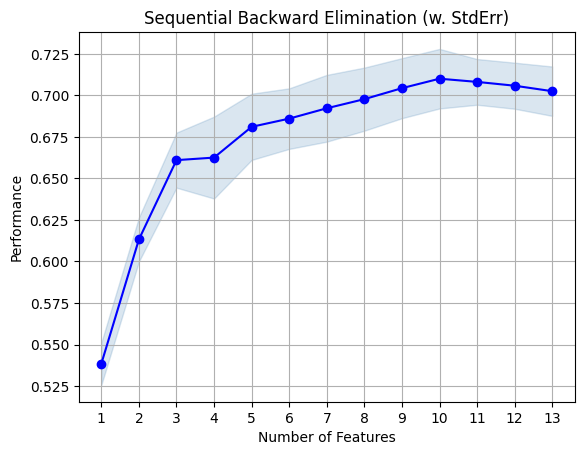

In [38]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [37]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

# Train the model
model = LinearRegression()
training_score = cross_val_score(model, X_train_sel, y_train, cv=5, scoring="r2").mean()
testing_score  = cross_val_score(model, X_test_sel, y_test, cv=5, scoring="r2").mean()

# Evaluate the model
print(f"Training score: {training_score:.3f}")
print(f"Testing score: {testing_score:.3f}")

Training score: 0.710
Testing score: 0.721


## 3. Sequential Forward Selection:

In [39]:
lr = LinearRegression()

# define the feature selection method; forward=True means forward selection
sfs = SFS(lr, k_features="best", forward=True, scoring='r2', cv=5, floating=False, n_jobs=-1)
sel = sfs.fit(X_train, y_train)

In [40]:
sfs.k_feature_names_, sfs.k_score_

(('crim', 'zn', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'),
 0.7100327839218562)

In [ ]:
# rest code is the same as the backward selection